# Third assignment: Network Robustness


# Part 1: Use small graphs to write the code

1. In the first part, you can use some graphs obtained by using the Networkx library or the library of your choice.
2. For each selected graph (max 2 or 3) you can perform different types of attack: turn off nodes at random, turn off the highest degree nodes, those with the highest pagerank, those with the highest betweenness, ...
2. After each removal, compute new measures, for example the size of the giant component or the diameter of the network and then plot these measures with respect to node failures. In case of networks of large size, often for the giant component S/N is plotted, e.g., the ratio between the size of the giant component and the size of the network.
2. Be careful, some of the functions you will use work only for undirected, connected graphs and therefore you need to instrument your code to work on the entire graph first, and then on the several components after the split of the original graph into smaller clusters.

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from scipy.io import mmread
from scipy import integrate

In [2]:
def remove_random_nodes(G:nx.Graph, percentage:float) -> nx.Graph:
    """Remove a percentage of random nodes from the graph G and return the resulting graph.

    Args:
        G: A networkx graph.
        percentage: percentage of nodes to remove from G.

    Returns:
        A networkx graph.
    """
    if percentage < 0 or percentage > 1:
        raise Exception("Percentage must be between 0 and 1")
    if G.number_of_nodes() <= 0:
        return G

    initial_nodes = G.number_of_nodes()
    if initial_nodes > 0:
        # Get random nodes from G
        nodes = list(G.nodes)
        num = int(percentage * len(nodes))
        if num < 1:
            num = 1
        nodes = random.sample(nodes, num)
        # remove num nodes from G (if num > len(nodes), remove all nodes)
        G.remove_nodes_from(nodes[0:num])
    # Return the resulting graph
    return G if G.number_of_nodes() != initial_nodes else nx.Graph()

def remove_highest_degree_node(G:nx.Graph, percentage:float) -> nx.Graph:
    """Remove a percentage of nodes with the highest degree from the graph G and return the resulting graph.
    
    Args:
        G: A networkx graph.
        percentage: percentage of nodes to remove from G.
        
    Returns:
        A networkx graph.
    """
    if percentage < 0 or percentage > 1:
        raise Exception("Percentage must be between 0 and 1")
    if G.number_of_nodes() <= 0:
        return nx.Graph()
    
    initial_nodes = G.number_of_nodes()
    if initial_nodes > 0:
        # Get random nodes from G
        nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
        num = int(percentage * len(nodes))
        if num < 1:
            num = 1
        nodes = [node[0] for node in nodes[0:num]]
        # remove num nodes from G (if num > len(nodes), remove all nodes)
        G.remove_nodes_from(nodes)
    # Return the resulting graph
    return G if G.number_of_nodes() != initial_nodes else nx.Graph()

def remove_highest_betweenness_node(G:nx.Graph, percentage:float) -> nx.Graph:
    """Remove a percentage of nodes with the highest betweenness centrality from the graph G and return the resulting graph.
    
    Args:
        G: A networkx graph.
        percentage: percentage of nodes to remove from G.
        
    Returns:
        A networkx graph.
    """
    if percentage < 0 or percentage > 1:
        raise Exception("Percentage must be between 0 and 1")
    if G.number_of_nodes() <= 0:
        return nx.Graph()
    
    initial_nodes = G.number_of_nodes()
    if initial_nodes > 0:
        # Get random nodes from G
        nodes = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)
        num = int(percentage * len(nodes))
        if num < 1:
            num = 1
        nodes = [node[0] for node in nodes[0:num]]
        # remove num nodes from G (if num > len(nodes), remove all nodes)
        G.remove_nodes_from(nodes)
    # Return the resulting graph
    return G if G.number_of_nodes() != initial_nodes else nx.Graph()

def remove_highest_pagerank_node(G:nx.Graph, percentage:float) -> nx.Graph:
    """Remove a percentage of nodes with the highest PageRank from the graph G and return the resulting graph.
    
    Args:
        G: A networkx graph.
        percentage: percentage of nodes to remove from G.
        
    Returns:
        A networkx graph.
    """
    if percentage < 0 or percentage > 1:
        raise Exception("Percentage must be between 0 and 1")
    if G.number_of_nodes() <= 0:
        return nx.Graph()
    
    initial_nodes = G.number_of_nodes()
    if initial_nodes > 0:
        # Get random nodes from G
        nodes = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
        num = int(percentage * len(nodes))
        if num < 1:
            num = 1
        nodes = [node[0] for node in nodes[0:num]]
        # remove num nodes from G (if num > len(nodes), remove all nodes)
        G.remove_nodes_from(nodes)
    # Return the resulting graph
    return G if G.number_of_nodes() != initial_nodes else nx.Graph()

def remove_highest_closeness_node(G: nx.Graph, percentage:float) -> nx.Graph:
    """Remove a percentage of nodes with the highest closeness centrality from the graph G and return the resulting graph.
    
    Args:
        G: A networkx graph.
        percentage: percentage of nodes to remove from G.
        
    Returns:
        A networkx graph.
    """
    if percentage < 0 or percentage > 1:
        raise Exception("Percentage must be between 0 and 1")
    if G.number_of_nodes() <= 0:
        return nx.Graph()
    
    initial_nodes = G.number_of_nodes()
    if initial_nodes > 0:
        # Get random nodes from G
        nodes = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)
        num = int(percentage * len(nodes))
        if num < 1:
            num = 1
        nodes = [node[0] for node in nodes[0:num]]
        # remove num nodes from G (if num > len(nodes), remove all nodes)
        G.remove_nodes_from(nodes)
    # Return the resulting graph
    return G if G.number_of_nodes() != initial_nodes else nx.Graph()

def get_lcc(G: nx.Graph) -> nx.Graph:
    """Get the largest connected component of the graph G and return the resulting graph.
    
    Args:
        G: A networkx graph.
        
    Returns:
        A networkx graph.
    """
    g = G.copy()
    # Get the largest connected component from G
    largest_comp = max(nx.connected_components(g), key=len) if len(G) > 0 else set()
    # Return the resulting graph
    return nx.Graph(g.subgraph(largest_comp))

def get_lcc_size(G: nx.Graph) -> int:
    """Deprecated. Use get_lcc instead."""
    raise Exception("Deprecated. Use get_lcc instead.")

def get_diameter(G: nx.Graph) -> int:
    """Get the diameter of the graph G and return the resulting diameter.
    
    Args:
        G: A networkx graph.
        
    Returns:
        An integer.
    """
    g_new = G.copy()
    if len(G) == 0:
        return 0
    if not nx.is_connected(G):
        g_new = G.subgraph(max(nx.connected_components(G), key=len))
    return nx.diameter(g_new) if len(g_new) > 0 else 0

In [3]:
def attack_random(G: nx.graph, percentage:float):
    g1 = G.copy()
    l1 = []
    d1 = []
    x1 = []
    print("g1")
    i = 0
    initial_nodes = g1.number_of_nodes()
    x1.append( i )
    l1.append( len(max(nx.connected_components(g1), key=len)) )
    d1.append( get_diameter(g1) )
    while g1.number_of_nodes() > 0:
        print(g1.number_of_nodes())
        x1.append( initial_nodes - g1.number_of_nodes() )
        l1.append( len(max(nx.connected_components(g1), key=len)) )
        d1.append( get_diameter(g1) )
        g1 = remove_random_nodes(g1, percentage)
        i += 1
    return l1, d1, x1

def attack_degree(G: nx.graph, percentage:float):
    g2 = G.copy()
    l2 = []
    d2 = []
    x2 = []
    print("g2")
    i = 0
    initial_nodes = g2.number_of_nodes()
    x2.append( i )
    l2.append( len(max(nx.connected_components(g2), key=len)) )
    d2.append( get_diameter(g2) )
    while g2.number_of_nodes() > 0:
        print(g2.number_of_nodes())
        x2.append( initial_nodes - g2.number_of_nodes() )
        l2.append( len(max(nx.connected_components(g2), key=len)) )
        d2.append( get_diameter(g2) )
        g2 = remove_highest_degree_node(g2, percentage)
        i += 1
    return l2, d2, x2

def attack_betweenness(G:nx.graph, percentage:float):
    g3 = G.copy()
    l3 = []
    d3 = []
    x3 = []
    print("g3")
    i = 0
    initial_nodes = g3.number_of_nodes()
    x3.append( i )
    l3.append( len(max(nx.connected_components(g3), key=len)) )
    d3.append( get_diameter(g3) )
    while g3.number_of_nodes() > 0:
        print(g3.number_of_nodes())
        x3.append( initial_nodes - g3.number_of_nodes() )
        l3.append( len(max(nx.connected_components(g3), key=len)) )
        d3.append( get_diameter(g3) )
        g3 = remove_highest_betweenness_node(g3, percentage)
        i += 1
    return l3, d3, x3

def attack_pagerank(G:nx.graph, percentage:float):
    g4 = G.copy()
    l4 = []
    d4 = []
    x4 = []
    print("g4")
    i = 0
    initial_nodes = g4.number_of_nodes()
    x4.append( i )
    l4.append( len(max(nx.connected_components(g4), key=len)) )
    d4.append( get_diameter(g4) )
    while g4.number_of_nodes() > 0:
        print(g4.number_of_nodes())
        x4.append( initial_nodes - g4.number_of_nodes() )
        l4.append( len(max(nx.connected_components(g4), key=len)) )
        d4.append( get_diameter(g4) )
        g4 = remove_highest_pagerank_node(g4, percentage)
        i += 1
    return l4, d4, x4

def attack_closeness(G:nx.graph, percentage:float):
    g5 = G.copy()
    l5 = []
    d5 = []
    x5 = []
    print("g5")
    i = 0
    initial_nodes = g5.number_of_nodes()
    x5.append( i )
    l5.append( len(max(nx.connected_components(g5), key=len)) )
    d5.append( get_diameter(g5) )
    while g5.number_of_nodes() > 0:
        print(g5.number_of_nodes())
        x5.append( initial_nodes - g5.number_of_nodes() )
        l5.append( len(max(nx.connected_components(g5), key=len)) )
        d5.append( get_diameter(g5) )
        g5 = remove_highest_closeness_node(g5, percentage)
        i += 1
    return l5, d5, x5

def plot_results(total_nodes, nodes_per_iteration,
        x1:list=None, l1:list=None, d1:list=None,
        x2:list=None, l2:list=None, d2:list=None,
        x3:list=None, l3:list=None, d3:list=None,
        x4:list=None, l4:list=None, d4:list=None,
        x5:list=None, l5:list=None, d5:list=None):
    
    # scale x axis from 0 to 1
    x1 = [x/total_nodes for x in x1]
    x2 = [x/total_nodes for x in x2]
    x3 = [x/total_nodes for x in x3]
    x4 = [x/total_nodes for x in x4]
    x5 = [x/total_nodes for x in x5]
    
    plt.figure(figsize=(16,16), dpi=300)
    plt.subplot(2, 1, 1)
    plt.title('Largest connected component size vs percentage of nodes removed')
    plt.plot(x1, l1, label='random')
    plt.plot(x2, l2, label='highest degree')
    plt.plot(x3, l3, label='highest betweenness')
    plt.plot(x4, l4, label='highest pagerank')
    plt.plot(x5, l5, label='highest closeness')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('giant component size')
    plt.grid()
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title('Diameter vs percentage of nodes removed')
    plt.plot(x1, d1, label='random', )
    plt.plot(x2, d2, label='highest degree')
    plt.plot(x3, d3, label='highest betweenness')
    plt.plot(x4, d4, label='highest pagerank')
    plt.plot(x5, d5, label='highest closeness')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('diameter')
    plt.grid()
    plt.legend()
    plt.show()



In [4]:

### Reading graph ###
# n=100
# p=0.1
# k=5
# G=nx.erdos_renyi_graph(n, p)
#G = nx.watts_strogatz_graph(n, k, p)

read_file = mmread('power-bcspwr10.mtx')
G = nx.Graph(read_file)
G.remove_edges_from(nx.selfloop_edges(G))

n = G.number_of_nodes()
m = G.number_of_edges()

print("n:", n)
print("m:", m)

G = nx.gnm_random_graph(n, m)

n: 5300
m: 8271


In [5]:
percentage = 0.01

In [6]:
l1, d1, x1 = attack_random(G, percentage)

g1
5300
5247
5195
5144
5093
5043
4993
4944
4895
4847
4799
4752
4705
4658
4612
4566
4521
4476
4432
4388
4345
4302
4259
4217
4175
4134
4093
4053
4013
3973
3934
3895
3857
3819
3781
3744
3707
3670
3634
3598
3563
3528
3493
3459
3425
3391
3358
3325
3292
3260
3228
3196
3165
3134
3103
3072
3042
3012
2982
2953
2924
2895
2867
2839
2811
2783
2756
2729
2702
2675
2649
2623
2597
2572
2547
2522
2497
2473
2449
2425
2401
2377
2354
2331
2308
2285
2263
2241
2219
2197
2176
2155
2134
2113
2092
2072
2052
2032
2012
1992
1973
1954
1935
1916
1897
1879
1861
1843
1825
1807
1789
1772
1755
1738
1721
1704
1687
1671
1655
1639
1623
1607
1591
1576
1561
1546
1531
1516
1501
1486
1472
1458
1444
1430
1416
1402
1388
1375
1362
1349
1336
1323
1310
1297
1285
1273
1261
1249
1237
1225
1213
1201
1189
1178
1167
1156
1145
1134
1123
1112
1101
1090
1080
1070
1060
1050
1040
1030
1020
1010
1000
990
981
972
963
954
945
936
927
918
909
900
891
883
875
867
859
851
843
835
827
819
811
803
795
788
781
774
767
760
753
746
739
732
725
718
71

In [7]:
l2, d2, x2 = attack_degree(G, percentage)

g2
5300
5247
5195
5144
5093
5043
4993
4944
4895
4847
4799
4752
4705
4658
4612
4566
4521
4476
4432
4388
4345
4302
4259
4217
4175
4134
4093
4053
4013
3973
3934
3895
3857
3819
3781
3744
3707
3670
3634
3598
3563
3528
3493
3459
3425
3391
3358
3325
3292
3260
3228
3196
3165
3134
3103
3072
3042
3012
2982
2953
2924
2895
2867
2839
2811
2783
2756
2729
2702
2675
2649
2623
2597
2572
2547
2522
2497
2473
2449
2425
2401
2377
2354
2331
2308
2285
2263
2241
2219
2197
2176
2155
2134
2113
2092
2072
2052
2032
2012
1992
1973
1954
1935
1916
1897
1879
1861
1843
1825
1807
1789
1772
1755
1738
1721
1704
1687
1671
1655
1639
1623
1607
1591
1576
1561
1546
1531
1516
1501
1486
1472
1458
1444
1430
1416
1402
1388
1375
1362
1349
1336
1323
1310
1297
1285
1273
1261
1249
1237
1225
1213
1201
1189
1178
1167
1156
1145
1134
1123
1112
1101
1090
1080
1070
1060
1050
1040
1030
1020
1010
1000
990
981
972
963
954
945
936
927
918
909
900
891
883
875
867
859
851
843
835
827
819
811
803
795
788
781
774
767
760
753
746
739
732
725
718
71

In [8]:
l3, d3, x3 = attack_betweenness(G, percentage)

g3
5300
5247
5195
5144
5093
5043
4993
4944
4895
4847
4799
4752
4705
4658
4612
4566
4521
4476
4432
4388
4345
4302
4259
4217
4175
4134
4093
4053
4013
3973
3934
3895
3857
3819
3781
3744
3707
3670
3634
3598
3563
3528
3493
3459
3425
3391
3358
3325
3292
3260
3228
3196
3165
3134
3103
3072
3042
3012
2982
2953
2924
2895
2867
2839
2811
2783
2756
2729
2702
2675
2649
2623
2597
2572
2547
2522
2497
2473
2449
2425
2401
2377
2354
2331
2308
2285
2263
2241
2219
2197
2176
2155
2134
2113
2092
2072
2052
2032
2012
1992
1973
1954
1935
1916
1897
1879
1861
1843
1825
1807
1789
1772
1755
1738
1721
1704
1687
1671
1655
1639
1623
1607
1591
1576
1561
1546
1531
1516
1501
1486
1472
1458
1444
1430
1416
1402
1388
1375
1362
1349
1336
1323
1310
1297
1285
1273
1261
1249
1237
1225
1213
1201
1189
1178
1167
1156
1145
1134
1123
1112
1101
1090
1080
1070
1060
1050
1040
1030
1020
1010
1000
990
981
972
963
954
945
936
927
918
909
900
891
883
875
867
859
851
843
835
827
819
811
803
795
788
781
774
767
760
753
746
739
732
725
718
71

In [9]:
l4, d4, x4 = attack_pagerank(G, percentage)

g4
5300
5247
5195
5144
5093
5043
4993
4944
4895
4847
4799
4752
4705
4658
4612
4566
4521
4476
4432
4388
4345
4302
4259
4217
4175
4134
4093
4053
4013
3973
3934
3895
3857
3819
3781
3744
3707
3670
3634
3598
3563
3528
3493
3459
3425
3391
3358
3325
3292
3260
3228
3196
3165
3134
3103
3072
3042
3012
2982
2953
2924
2895
2867
2839
2811
2783
2756
2729
2702
2675
2649
2623
2597
2572
2547
2522
2497
2473
2449
2425
2401
2377
2354
2331
2308
2285
2263
2241
2219
2197
2176
2155
2134
2113
2092
2072
2052
2032
2012
1992
1973
1954
1935
1916
1897
1879
1861
1843
1825
1807
1789
1772
1755
1738
1721
1704
1687
1671
1655
1639
1623
1607
1591
1576
1561
1546
1531
1516
1501
1486
1472
1458
1444
1430
1416
1402
1388
1375
1362
1349
1336
1323
1310
1297
1285
1273
1261
1249
1237
1225
1213
1201
1189
1178
1167
1156
1145
1134
1123
1112
1101
1090
1080
1070
1060
1050
1040
1030
1020
1010
1000
990
981
972
963
954
945
936
927
918
909
900
891
883
875
867
859
851
843
835
827
819
811
803
795
788
781
774
767
760
753
746
739
732
725
718
71

In [10]:
l5, d5, x5 = attack_closeness(G, percentage)

g5
5300
5247
5195
5144
5093
5043
4993
4944
4895
4847
4799
4752
4705
4658
4612
4566
4521
4476
4432
4388
4345
4302
4259
4217
4175
4134
4093
4053
4013
3973
3934
3895
3857
3819
3781
3744
3707
3670
3634
3598
3563
3528
3493
3459
3425
3391
3358
3325
3292
3260
3228
3196
3165
3134
3103
3072
3042
3012
2982
2953
2924
2895
2867
2839
2811
2783
2756
2729
2702
2675
2649
2623
2597
2572
2547
2522
2497
2473
2449
2425
2401
2377
2354
2331
2308
2285
2263
2241
2219
2197
2176
2155
2134
2113
2092
2072
2052
2032
2012
1992
1973
1954
1935
1916
1897
1879
1861
1843
1825
1807
1789
1772
1755
1738
1721
1704
1687
1671
1655
1639
1623
1607
1591
1576
1561
1546
1531
1516
1501
1486
1472
1458
1444
1430
1416
1402
1388
1375
1362
1349
1336
1323
1310
1297
1285
1273
1261
1249
1237
1225
1213
1201
1189
1178
1167
1156
1145
1134
1123
1112
1101
1090
1080
1070
1060
1050
1040
1030
1020
1010
1000
990
981
972
963
954
945
936
927
918
909
900
891
883
875
867
859
851
843
835
827
819
811
803
795
788
781
774
767
760
753
746
739
732
725
718
71

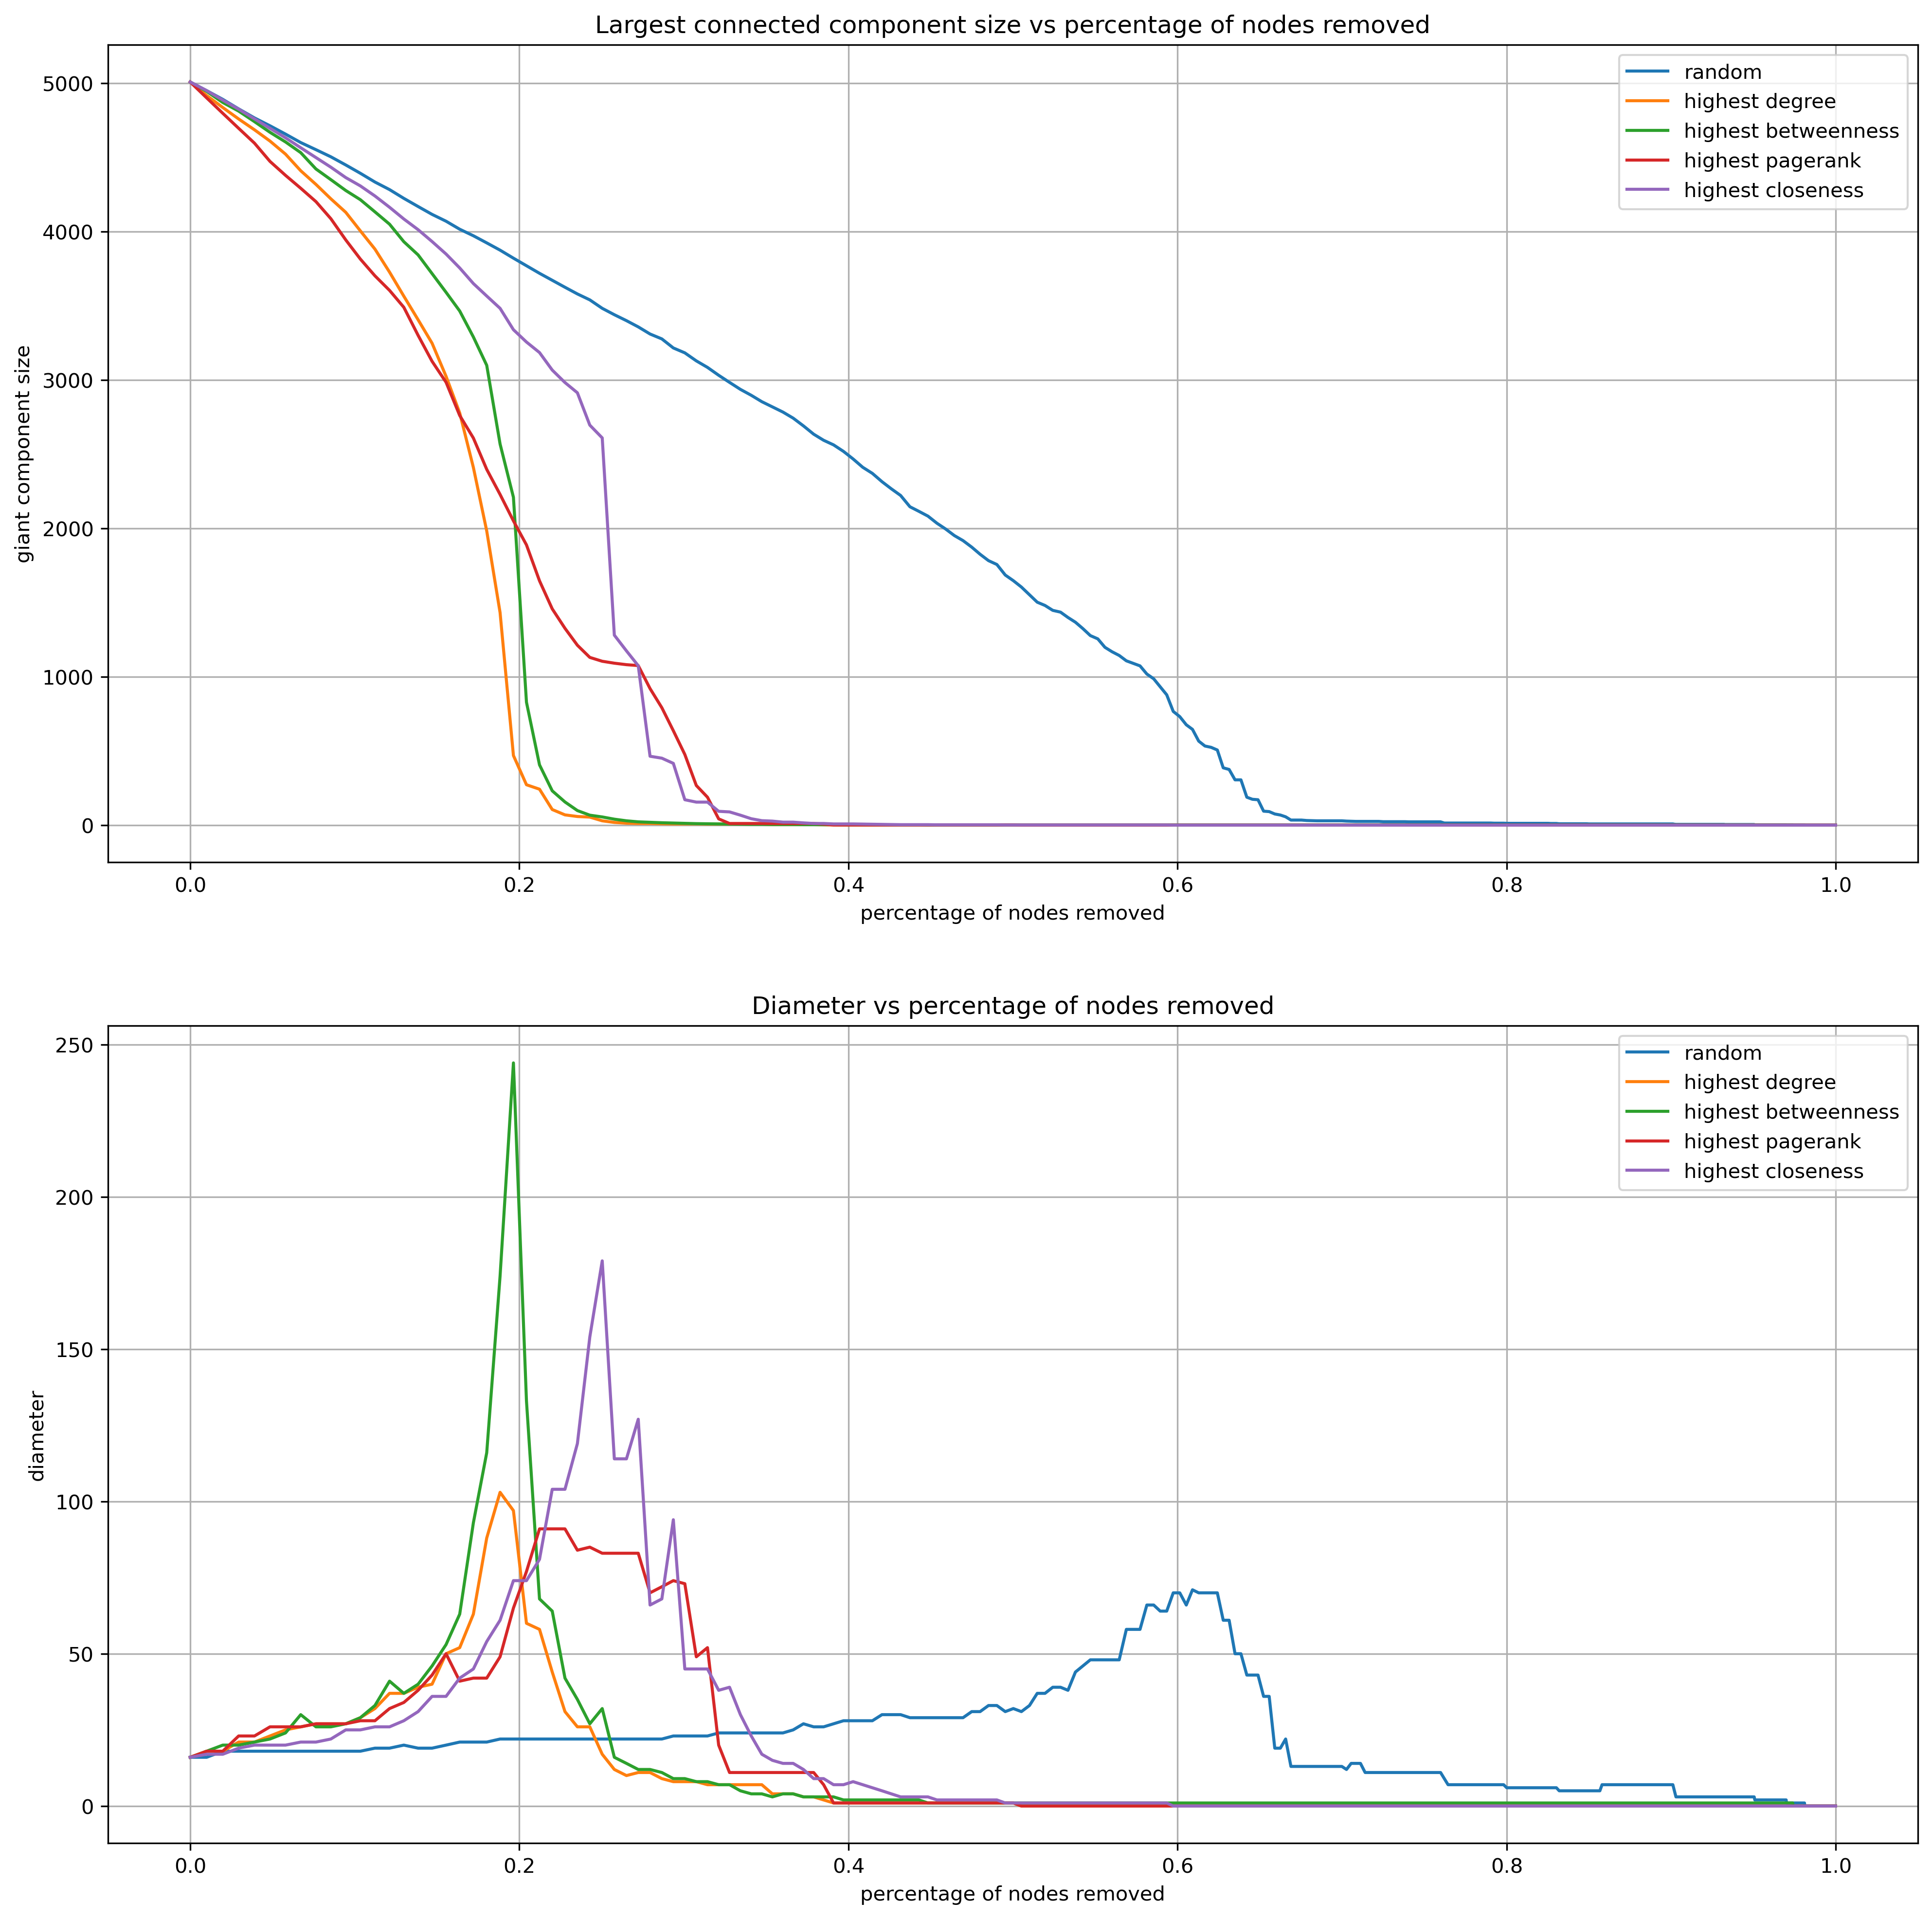

In [11]:
plot_results(total_nodes=n, nodes_per_iteration=percentage,
    x1=x1, l1=l1, d1=d1
    ,x2=x2, l2=l2, d2=d2
    ,x3=x3, l3=l3, d3=d3
    ,x4=x4, l4=l4, d4=d4
    ,x5=x5, l5=l5, d5=d5
    )